**For the given data ‘MonthWiseMarketArrivals_Clean.csv’, below is attribute information**

**This dataset is about Indian onion market.**


**1. Market Name - Market Place Name**


**2. Month - Month (January-December)**


**3. Year - 1996-2016**


**4. Quantity - Quantity of Onion (in Kgs)**


**5. priceMin - Minimum Selling Price**

**6. priceMax - Maximum Selling Price**


**7. Pricemod - Modal Price**


**8. State - State of market**


**9. City - City of market**


**10. Date - Date of arrival**


# Import Packages

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
sns.set()

In [38]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50 # None

# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.2f}'.format

# Load Data

In [39]:
df = pd.read_csv("../Dataset/MonthWiseMarketArrivals_Clean.csv",sep=",", encoding='cp1252')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


# Data Preparation

## Dimensions of Dataset

In [40]:
# Checking structure of the data
df.shape

(10227, 10)

## Statistical Summary

In [41]:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.00,10227.00,10227.00,10227.00,10227.00
mean,2009.02,76604.88,646.94,1212.76,984.28
std,4.37,124408.70,673.12,979.66,818.47
min,1996.00,20.00,16.00,145.00,80.00
25%,2006.00,8898.00,209.00,557.00,448.00
50%,2009.00,27460.00,440.00,923.00,747.00
75%,2013.00,88356.50,828.00,1527.00,1248.00
max,2016.00,1639032.00,6000.00,8192.00,6400.00


## Checking for Missing Values 

In [42]:
# summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [43]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

**There are no missing values**

In [44]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2005-01-01', '2006-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2005-02-01', '2006-02-01',
               ...
               '2006-12-01', '2007-12-01', '2008-12-01', '2009-12-01',
               '2010-12-01', '2011-12-01', '2012-12-01', '2013-12-01',
               '2014-12-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=10227, freq=None)

In [45]:
df.sort_index(inplace=True)
df.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON
1996-06-01,LASALGAON(MS),June,1996,175308,229,413,367,MS,LASALGAON
1996-07-01,LASALGAON(MS),July,1996,156282,229,406,368,MS,LASALGAON
1996-08-01,LASALGAON(MS),August,1996,173892,164,388,340,MS,LASALGAON
1996-09-01,LASALGAON(MS),September,1996,138648,145,363,317,MS,LASALGAON


In [46]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city'],
      dtype='object')

In [47]:
columns=['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state']

In [48]:
Onions= df.drop(columns,axis=1)
Onions.head()

,priceMod,city
date,,
1996-01-01,226,LASALGAON
1996-02-01,186,LASALGAON
1996-03-01,243,LASALGAON
1996-04-01,254,LASALGAON
1996-05-01,269,LASALGAON


In [49]:
Onions['city'].unique()

array(['LASALGAON', 'NIPHAD', 'SAIKHEDA', 'SINNAR', 'PIMPALGAON',
       'LONAND', 'CHAKAN', 'MANMAD', 'BHAVNAGAR', 'MAHUVA', 'PUNE',
       'AHMEDNAGAR', 'HUBLI', 'RAHURI', 'DEWAS', 'DHAVANGERE', 'BOMBORI',
       'DINDIGUL', 'NASIK', 'GONDAL', 'INDORE', 'DHULIA', 'HASSAN',
       'RAJKOT', 'DELHI', 'KARNAL', 'MANDSOUR', 'JAIPUR', 'KALVAN',
       'LUCKNOW', 'CHICKBALLAPUR', 'SHIMLA', 'KURNOOL', 'SURAT', 'YEOLA',
       'KANPUR', 'KOLAR', 'MALEGAON', 'BELGAUM', 'PATNA', 'SOLAPUR',
       'KOLHAPUR', 'SRINAGAR', 'KOLKATA', 'BANGALORE', 'NAGPUR',
       'HYDERABAD', 'MUMBAI', 'CHENNAI', 'AMRITSAR', 'MADURAI',
       'GUWAHATI', 'JALANDHAR', 'RANCHI', 'UJJAIN', 'BIJAPUR', 'JUNNAR',
       'TRIVENDRUM', 'JAMMU', 'AHMEDABAD', 'SATANA', 'ABOHAR', 'AGRA',
       'VARANASI', 'BHUBNESWER', 'JALGAON', 'SANGALI', 'SANGAMNER',
       'BHOPAL', 'JODHPUR', 'SHRIRAMPUR', 'BHATINDA', 'DEVALA', 'PATIALA',
       'LUDHIANA', 'VANI', 'DINDORI', 'RAIPUR', 'UDAIPUR', 'DEORIA',
       'ALWAR', 'COIMBATORE'

In [55]:
New=pd.DataFrame(Onions[Onions.city=="MUMBAI"]["priceMod"])
New

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


# Time Series Analysis

## Visualizing data

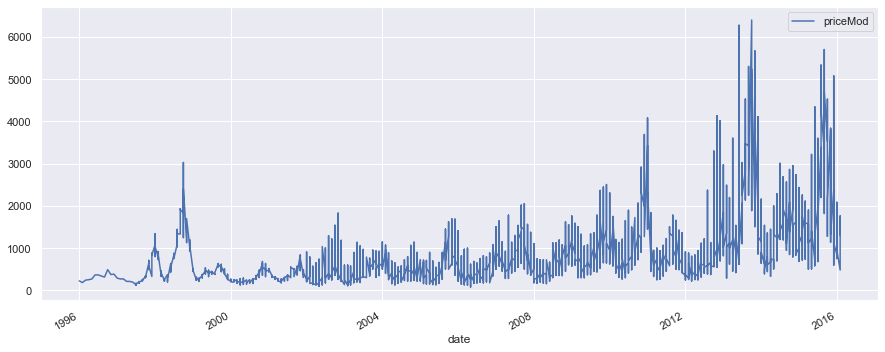

In [63]:
Onions.plot(figsize=(15, 6))
plt.show()

## Sampling

In [64]:
y = Onions['priceMod'].resample('MS').mean() # MS = Monthly Start
y

date
1996-01-01    226.00
1996-02-01    186.00
1996-03-01    243.00
1996-04-01    254.00
1996-05-01    269.00
               ...  
2015-10-01   2838.79
2015-11-01   2101.06
2015-12-01   1427.52
2016-01-01   1186.46
2016-02-01    926.35
Freq: MS, Name: priceMod, Length: 242, dtype: float64

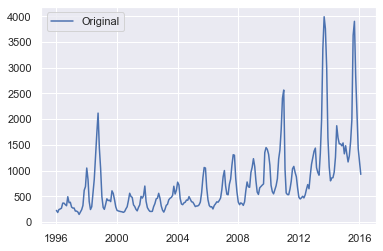

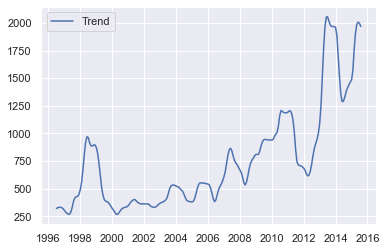

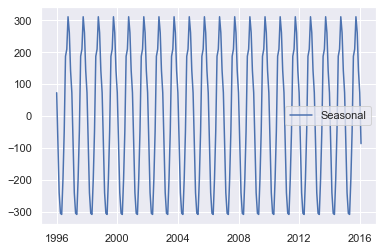

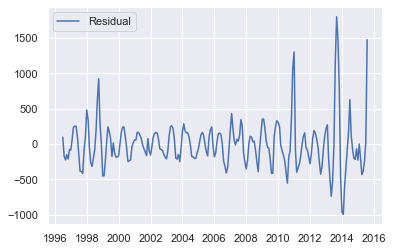

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

## Checking Stationarity

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.552957
p-value: 0.507171
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


**The p-value is 0.50717,which is way above the threshold (0.5) hence the null hypothesis is accepted it suggests the time series is not stationary its is having trend and seasonality hence we will have to use winter holt' test** 

## Decomposing

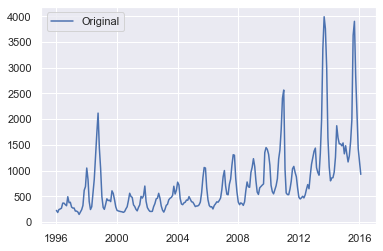

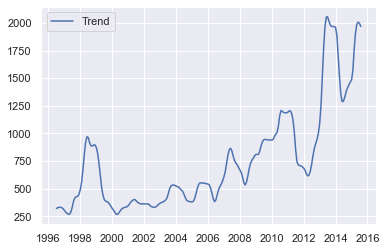

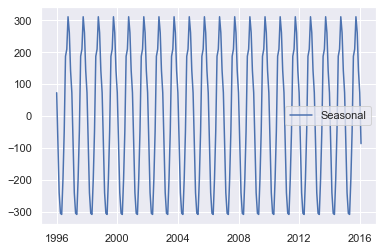

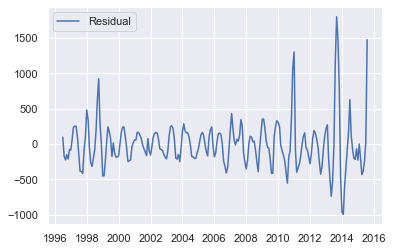

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

# Time Series Forcasting using ARIMA

In [69]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## Parameter Selection 

In [74]:
from pylab import rcParams
fr=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            fr.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4022.9705236045165
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3758.8207346913
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3639.422542603922
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3369.326171739504
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3648.8387262242145
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3509.549059870718
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3368.3149004536717
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3347.0036820671585
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3719.267301261003
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3487.5486780462415
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3425.634762931715
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3151.354251665224
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3438.3257752283484
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3290.689568333847
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3171.933770578774
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3130.779469528691
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3409.2400086977204
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3251.809090410975
ARIMA

In [75]:
np.min(fr)

2987.4316043420786

**ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2987.4316043420786**

## Fitting the ARIMA model

In [72]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])results

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4577      0.046     10.030      0.000       0.368       0.547
ma.S.L12      -0.9043      0.058    -15.620      0.000      -1.018      -0.791
sigma2       6.29e+04   2636.315     23.858      0.000    5.77e+04    6.81e+04


In [76]:
results

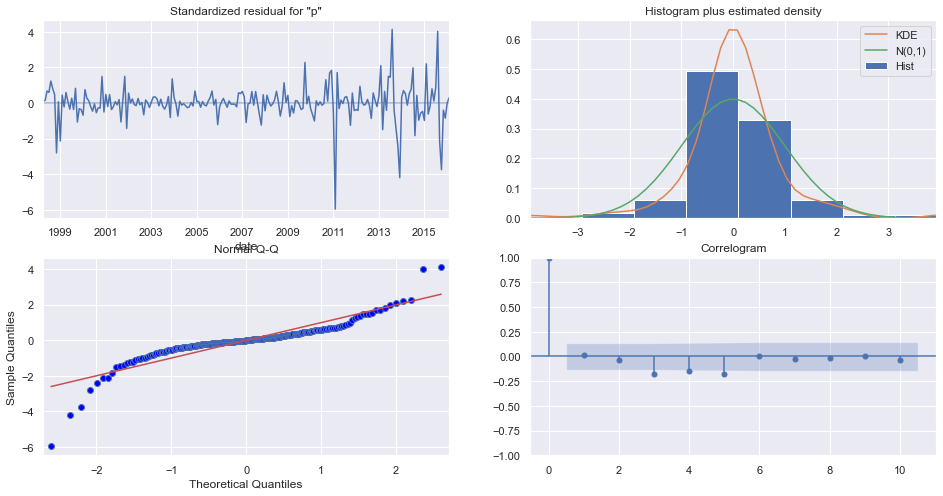

In [77]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

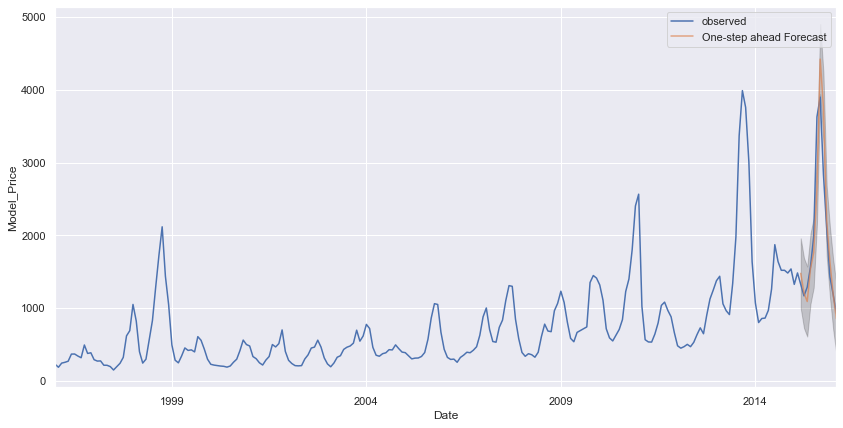

In [80]:
#set forecasts to start at 2016-02-01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2015-03-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1996':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Model_Price')
plt.legend()
plt.show()

## Calculating MSE and RMSE

In [81]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-03-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 189083.54
The Root Mean Squared Error of our forecasts is 434.84


In [88]:
#import Library
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

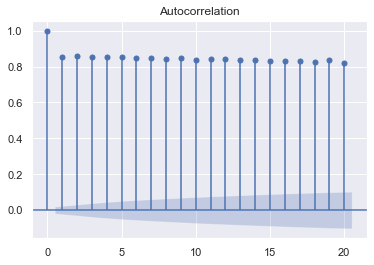

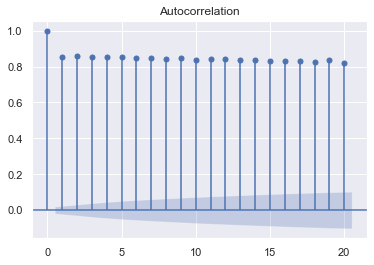

In [84]:
# Draw Plot
plot_acf(df['priceMod'].tolist(), lags=20)

## Visualizing the Forecast 

            lower priceMod  upper priceMod
2016-03-01          316.50         1279.75
2016-04-01         -109.81         1657.15
2016-05-01         -416.44         1933.55
2016-06-01         -466.57         2353.10
2016-07-01         -365.73         2856.41
2016-08-01         -481.69         3098.02
2016-09-01         -545.18         3359.50
2016-10-01         -479.92         3724.69
2016-11-01         -610.30         3874.22
2016-12-01         -878.88         3869.08
2017-01-01        -1133.62         3863.92
2017-02-01        -1392.74         3842.49
2017-03-01        -1654.81         3767.21


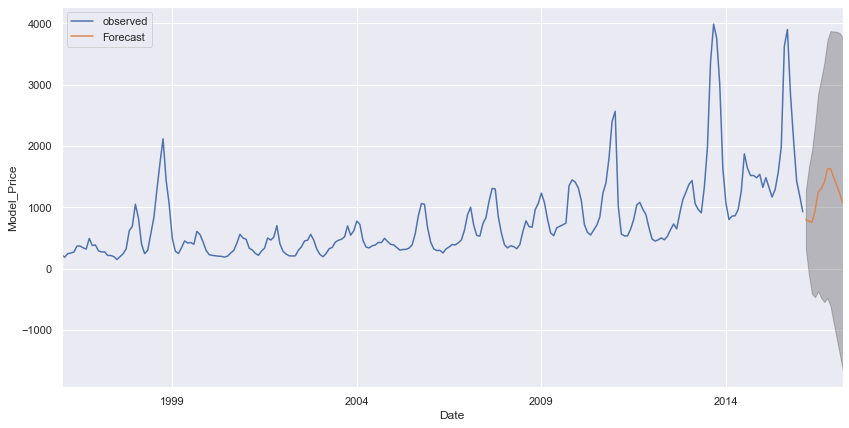

In [87]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Model_Price')
print(pred_ci)
plt.legend()
plt.show()

# Conclusion

**We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for Indian onion market. sales in the normal store. The sales for onion increases linearly over time.**